In [6]:
import os
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_ref:
    zip_ref.extractall('data/train')

with zipfile.ZipFile('data/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('data/test1')

In [7]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root='data/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [9]:
test_dataset = datasets.ImageFolder(root='data/test1', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root='data/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [11]:
# Duyệt qua data loader
for batch_idx, (images, labels) in enumerate(train_loader):
    # Xử lý từng batch dữ liệu ở đây
    print(f'Batch {batch_idx + 1}:')
    print(f'Kích thước batch: {images.size(0)}')  # Kích thước của batch
    print(f'Kích thước hình ảnh: {images.shape[1:]}')  # Kích thước của từng hình ảnh trong batch
    print(f'Kích thước nhãn: {labels.shape}')  # Kích thước của nhãn trong batch

    # Tùy chọn, bạn có thể in ra nhãn của từng hình ảnh trong batch
    for i, label in enumerate(labels):
        print(f'Nhãn của hình ảnh {i}: {label}')

    # Dừng sau khi duyệt qua batch đầu tiên
    if batch_idx == 0:
        break

Batch 1:
Kích thước batch: 32
Kích thước hình ảnh: torch.Size([3, 128, 128])
Kích thước nhãn: torch.Size([32])
Nhãn của hình ảnh 0: 0
Nhãn của hình ảnh 1: 0
Nhãn của hình ảnh 2: 0
Nhãn của hình ảnh 3: 0
Nhãn của hình ảnh 4: 0
Nhãn của hình ảnh 5: 0
Nhãn của hình ảnh 6: 0
Nhãn của hình ảnh 7: 0
Nhãn của hình ảnh 8: 0
Nhãn của hình ảnh 9: 0
Nhãn của hình ảnh 10: 0
Nhãn của hình ảnh 11: 0
Nhãn của hình ảnh 12: 0
Nhãn của hình ảnh 13: 0
Nhãn của hình ảnh 14: 0
Nhãn của hình ảnh 15: 0
Nhãn của hình ảnh 16: 0
Nhãn của hình ảnh 17: 0
Nhãn của hình ảnh 18: 0
Nhãn của hình ảnh 19: 0
Nhãn của hình ảnh 20: 0
Nhãn của hình ảnh 21: 0
Nhãn của hình ảnh 22: 0
Nhãn của hình ảnh 23: 0
Nhãn của hình ảnh 24: 0
Nhãn của hình ảnh 25: 0
Nhãn của hình ảnh 26: 0
Nhãn của hình ảnh 27: 0
Nhãn của hình ảnh 28: 0
Nhãn của hình ảnh 29: 0
Nhãn của hình ảnh 30: 0
Nhãn của hình ảnh 31: 0


In [12]:
print(f'Batch size: {images.shape[0]}')
print(f'Image size: {images.shape[1:]}')
print(f'Number of unique classes: {len(train_dataset.classes)}')
print(f'Class names: {train_dataset.classes}')

Batch size: 32
Image size: torch.Size([3, 128, 128])
Number of unique classes: 1
Class names: ['train']


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

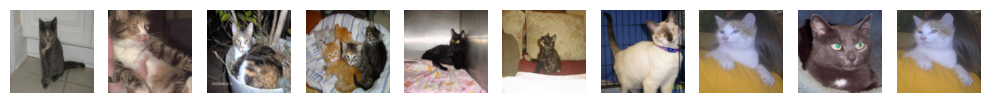

In [14]:
R, C = len(train_dataset.classes), 10

# Tạo figure và axes
fig, ax = plt.subplots(R, C, figsize=(10, 10))

# Lặp qua từng lớp
for label_class in range(R):  # Vòng lặp qua số lượng lớp
    # Lấy các chỉ số của nhãn tương ứng
    label_x_rows = np.where(labels == label_class)[0]
    
    # Lặp qua từng ô trong hàng hiện tại
    for j in range(C):  # Vòng lặp qua số lượng cột
        plot_cell = ax[label_class * C + j]  # Chọn subplot tương ứng
        plot_cell.grid(False)
        plot_cell.axis('off')
        
        # Chọn ngẫu nhiên một hình ảnh từ nhãn hiện tại
        ix = np.random.choice(label_x_rows)
        x, y = images[ix], labels[ix]
        
        # Hiển thị hình ảnh trong ô hiện tại với màu xám
        plot_cell.imshow(x.permute(1, 2, 0), cmap='gray')  # permute để chuyển chiều của hình ảnh

plt.tight_layout()
plt.show()

In [15]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root='data/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [17]:
class dogcat(Dataset):
    def __init__(self, x, y):
            x = x.float()
            x = x.view(-1,28*28)
            self.x, self.y = x, y
def __getitem__(self, ix):
    x, y = self.x[ix], self.y[ix]
    return x.to(device), y.to(device)
def __len__(self):
    return len(self.x)

In [18]:
def get_data():
        train = dogcat(tr_images, tr_targets)
        trn_dl = DataLoader(train, batch_size=32, shuffle=True)
        return trn_dl

In [19]:
from torch.optim import SGD
def get_model():
    model = nn.Sequential(
    nn.Linear(28 * 28, 1000),
    nn.ReLU(),
    nn.Linear(1000, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

In [20]:
def train_batch(x, y, model, opt, loss_fn):
    model.train() # <- let's hold on to this until we reach dropout section
# call your model like any python function on your batch of inputs
    prediction = model(x)
# compute loss
    batch_loss = loss_fn(prediction, y)
# based on the forward pass in `model(x)` compute all the gradients of
# 'model.parameters()'
    batch_loss.backward()
# apply new-weights = f(old-weights, old-weight-gradients) where
# "f" is the optimizer
    optimizer.step()
# Flush gradients memory for next batch of calculations
    optimizer.zero_grad()
    return batch_loss.item()

In [21]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval() # <- let's wait till we get to dropout section
# get the prediction matrix for a tensor of `x` images
    prediction = model(x)
# compute if the location of maximum in each row coincides
# with ground truth
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [22]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 2)  # 2 classes: Cat and Dog

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)  # Flatten tensor thành vector
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [23]:
def train_batch(x, y, model, optimizer, loss_fn):
    model.train()
    optimizer.zero_grad()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    return batch_loss.item()

In [24]:
def accuracy(x, y, model):
    model.eval()
    with torch.no_grad():
        prediction = model(x)
        is_correct = (torch.argmax(prediction, dim=1) == y).float()
    return is_correct.numpy()


In [25]:
import torch.optim as optim
model = SimpleCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
losses, accuracies = [], []
for epoch in range(5):
    print(f"Epoch {epoch + 1}/{5}")
    
    epoch_losses, epoch_accuracies = [], []

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [26]:
for ix, batch in enumerate(train_loader):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)
    epoch_losses.append(batch_loss)
    
epoch_loss = np.array(epoch_losses).mean()
    